<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ 5. <b>Регрессия, классификация и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [1]:
surname = "Oops" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<p><span style="color:red; font-weight:bold">ВНИМАНИЕ!</span> Варианты могут не совпадать с предыдущими ДЗ</p>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Задача 1.</b> Регрессия</p>

<p>Дано множество наблюдений (файл "Reg_A5.csv"), регрессор - линейная регрессия. Найти степень полинома (см. Семинар 7) с минимальной ошибкой на проверочном подможестве, определить среднеквадратическую ошибку на тестовом подмножестве? (Степень полинома от 1 до 25)</p>
<p>
Построить графики:<br>
1) зависимости <b>среднеквадратической ошибки</b> от степени полинома для обучающего и проверочного подмножеств<br>
2) зависимости <b>R-квадрата</b> от степени полинома для обучающего и проверочного подмножеств<br>
3) функцию регрессии (наилучший случай) + исходные данные</p>

In [2]:
#0) Подключение библиотек
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from numpy.polynomial.polynomial import polyval

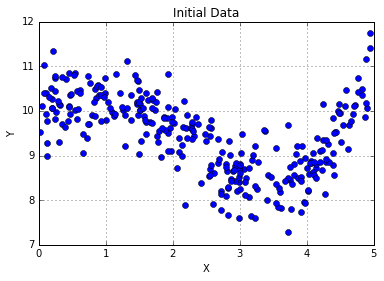

In [3]:
#1) Исходные данные

df = pnd.read_csv("Reg_A5.csv")

x = df.X.values
y = df.Y.values

plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

In [4]:
#2) Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств
x = x.reshape(-1,1)
x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = cross_validation.train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

In [5]:
#3) Обучение
#LinearRegression с нормализацией X

linReg = LinearRegression(normalize=True)
linReg = linReg.fit(x_train, y_train)

In [6]:
def plot_deg_train_val(name, deg, train, val, height=4, width=17):
    plt.figure(1, figsize=[width, height])
    plt.xticks(deg)
    plt.title(name)
    plt.plot(deg, train, color='red', lw=2)
    plt.plot(deg, val, color='blue', lw=2)
    plt.legend(["Train MSE", "Val MSE"])
    plt.grid(True)
    plt.show()
    
def lin_regr_fit_metrics(deg, x, y, x_val, y_val, metric=0):
    pl_linReg = Pipeline([("plF", PolynomialFeatures(degree=deg)), ("lr", linReg)])
    pl_linReg = pl_linReg.fit(x, y)
    if metric == 1:
        return mean_squared_error(y, pl_linReg.predict(x)), mean_squared_error(y_val, pl_linReg.predict(x_val))
    else:
        return pl_linReg.score(x, y), pl_linReg.score(x_val, y_val)

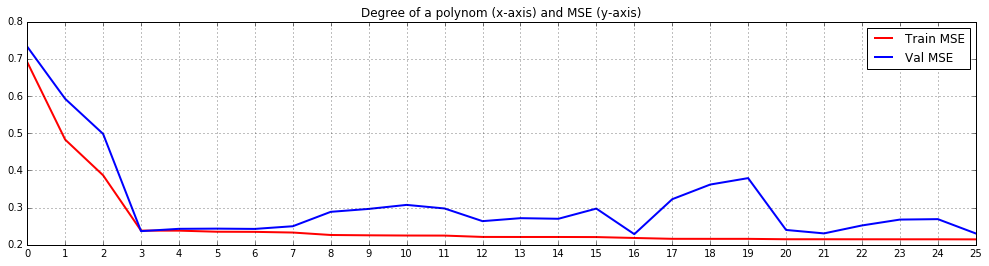

In [7]:
#4) Графики зависимости среднеквадратической ошибки от степени полинома для обучающего и проверочного подмножеств

deg, train, val = [i for i in range(0,26)], [], []

for i in deg:
    trainRes, valRes = lin_regr_fit_metrics(i, x_train, y_train, x_val, y_val, metric=1)
    train.append(trainRes)
    val.append(valRes)

plot_deg_train_val("Degree of a polynom (x-axis) and MSE (y-axis)", deg, train, val)

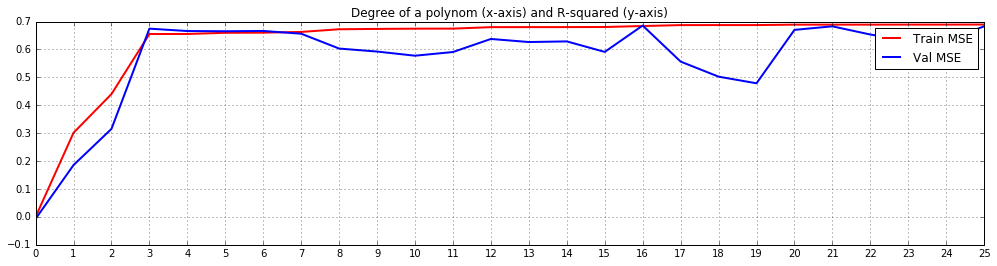

In [8]:
#5) Графики зависимости R-квадрата от степени полинома для обучающего и проверочного подмножеств

r2_train, r2_val = [], []

for i in deg:
    trainRes, valRes = lin_regr_fit_metrics(i, x_train, y_train, x_val, y_val)
    r2_train.append(trainRes)
    r2_val.append(valRes)
    
plot_deg_train_val("Degree of a polynom (x-axis) and R-squared (y-axis)", deg, r2_train, r2_val)

In [9]:
#6) Выбор степени полинома + повторное обучение модели на train_init
# Выберем степень полинома: 16

pl_linReg_16 = Pipeline([("plF", PolynomialFeatures(degree=16)), ("lr", linReg)])
pl_linReg_16 = pl_linReg_16.fit(x_train_init, y_train_init)

In [10]:
#7) Cреднеквадратическая ошибка на тестовом подмножестве

mse_16 = mean_squared_error(y_test, pl_linReg_16.predict(x_test))
mse_16

0.26019291340046136

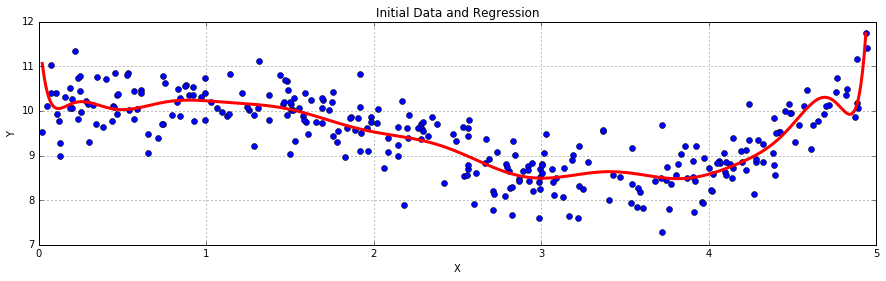

In [11]:
#8) График функции регрессии (наилучший случай) + исходные данные
x_plot = np.arange(min(x), max(x), 0.01)

plt.figure(1, figsize=[15,4])
plt.title("Initial Data and Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.plot(x_plot, pl_linReg_16.predict(x_plot.reshape(-1,1)), color='red', lw=3)
plt.grid(True)
plt.show()

<p><b>Задача 2.</b> Классификация</p>

<p>Дано множество наблюдений (файл "Cl_A5_Vx.csv"), классификатор - логистическая регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить долю правильных классификаций на тестовом подмножестве?</p>
<p>
Построить графики:<br>
1) зависимости доли правильных классификаций от <b>степени полинома</b> для обучающего и проверочного подмножеств<br>
2) зависимости доли правильных классификаций от <b>количества итераций</b> для обучающего и проверочного подмножеств для наилучшего случая<br>
3) результат классификации для наилучшего случая для обучающего и проверочного подмножеств</p>
4) результат классификации для тестового подмножества</p>

In [12]:
#0) Подключение библиотек

from matplotlib.colors import ListedColormap
clrMap = ListedColormap(["blue", "red", "green"])

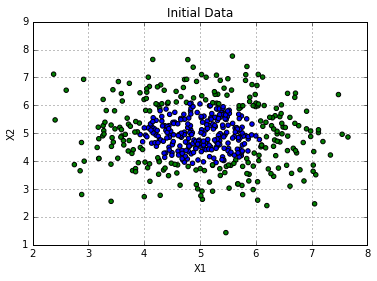

In [13]:
#1) Исходные данные
df = pnd.read_csv("Cl_A5_V"+str(variant)+".csv") #variant - вариант задания

plt.title("Initial Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(df.X1, df.X2, c=df.Y, cmap=clrMap)
plt.grid(True)
plt.show()

In [14]:
#2) Формирование обучающего и тестового подмножеств

x = list(zip(df.X1, df.X2))
y = df.Y.values
x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = cross_validation.train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

In [15]:
#3) Обучение
#Параметры классификатора
#penalty="l2", fit_intercept=True, max_iter=x, C=1e5, solver="lbfgs", random_state=12345

logReg = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e5, solver="lbfgs", random_state=12345)
logReg = logReg.fit(x_train, y_train)

In [16]:
def log_regr_score(x_train, y_train, x_val, y_val, deg=4, n=100):
    pl_logReg = Pipeline([("plF", PolynomialFeatures(degree=deg)),
                          ("lgr", LogisticRegression(penalty="l2", fit_intercept=True,
                                                     max_iter=n, C=1e5, solver="lbfgs", random_state=12345))])
    pl_logReg = pl_logReg.fit(x_train, y_train)
    
    return pl_logReg.score(x_train, y_train), pl_logReg.score(x_val, y_val)

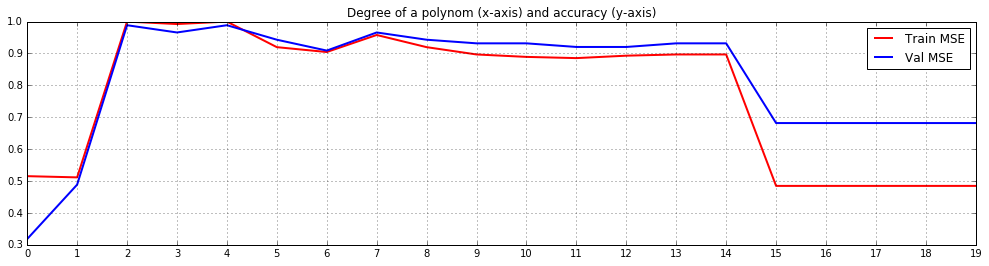

In [17]:
#4) Графики зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств
deg = [i for i in range(0,20)]
train = []
val = []
for i in deg:
    trainRes, valRes = log_regr_score(x_train, y_train, x_val, y_val, deg=i)
    
    train.append(trainRes)
    val.append(valRes)
    
plot_deg_train_val("Degree of a polynom (x-axis) and accuracy (y-axis)", deg, train, val)

In [18]:
#5) Выбор степени полинома + повторное обучение модели на train
# Выьерем степень 4
pl_logReg_4 = Pipeline([("plF", PolynomialFeatures(degree=4)), 
                     ("lgr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, 
                                                   C=1e5, solver="lbfgs", random_state=12345))])
pl_logReg_4 = pl_logReg_4.fit(x_train, y_train)

In [19]:
#6) Графики зависимости доли правильных классификаций от количества итераций для обучающего (train) и проверочного
#подмножеств для наилучшего случая - изменение параметра max_iter

num = range(1,101)
train = []
val = []
for i in num:
    trainRes, valRes = log_regr_score(x_train, y_train, x_val, y_val, n=i)
    
    train.append(trainRes)
    val.append(valRes)

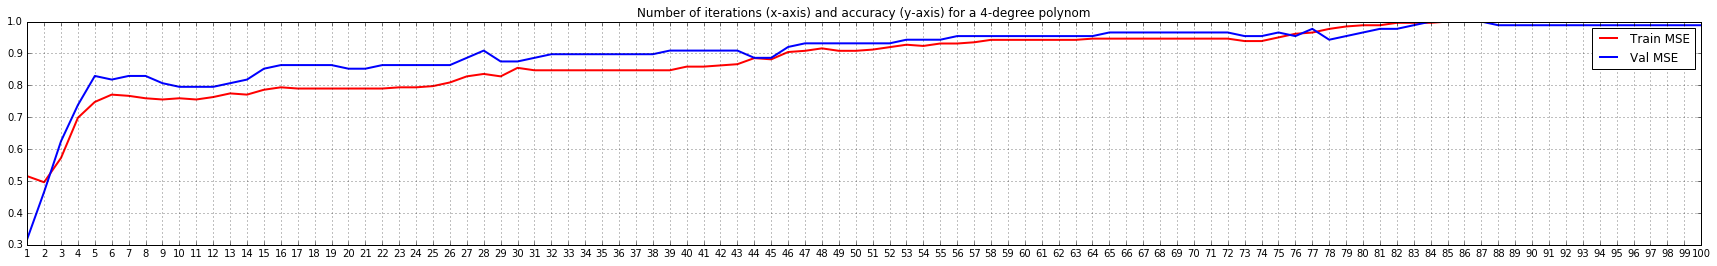

In [20]:
plot_deg_train_val("Number of iterations (x-axis) and accuracy (y-axis) for a 4-degree polynom", num, train, val, width=30)

In [21]:
#7) Повторное обучение модели на train_init
pl_regr_4_86 = Pipeline([("plF", PolynomialFeatures(degree=4)),
                        ("lgr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=86, 
                                                   C=1e5, solver="lbfgs", random_state=12345))])
pl_regr_4_86 = pl_regr_4_86.fit(x_train_init, y_train_init)

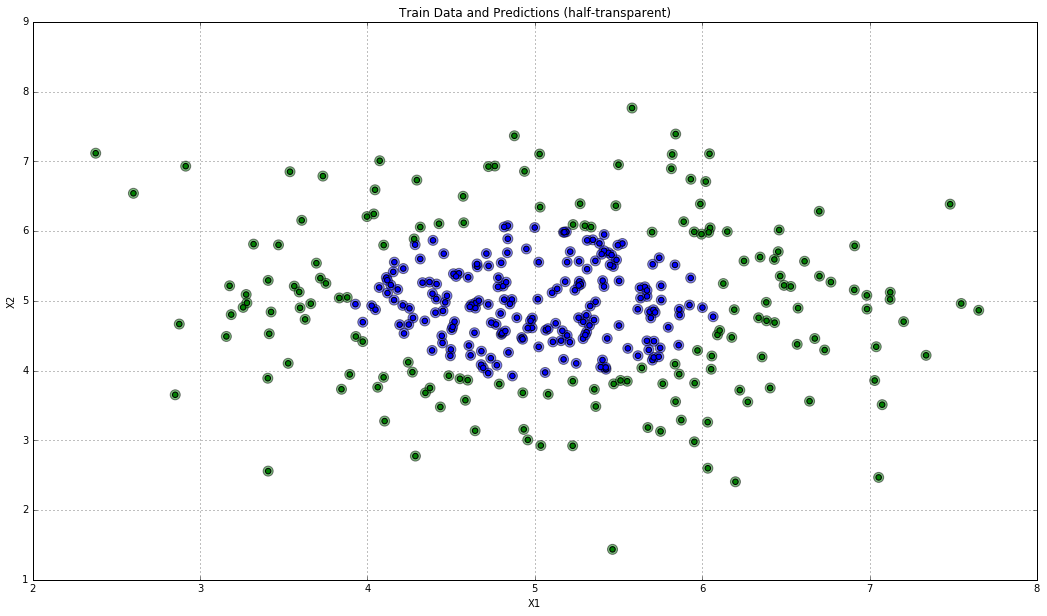

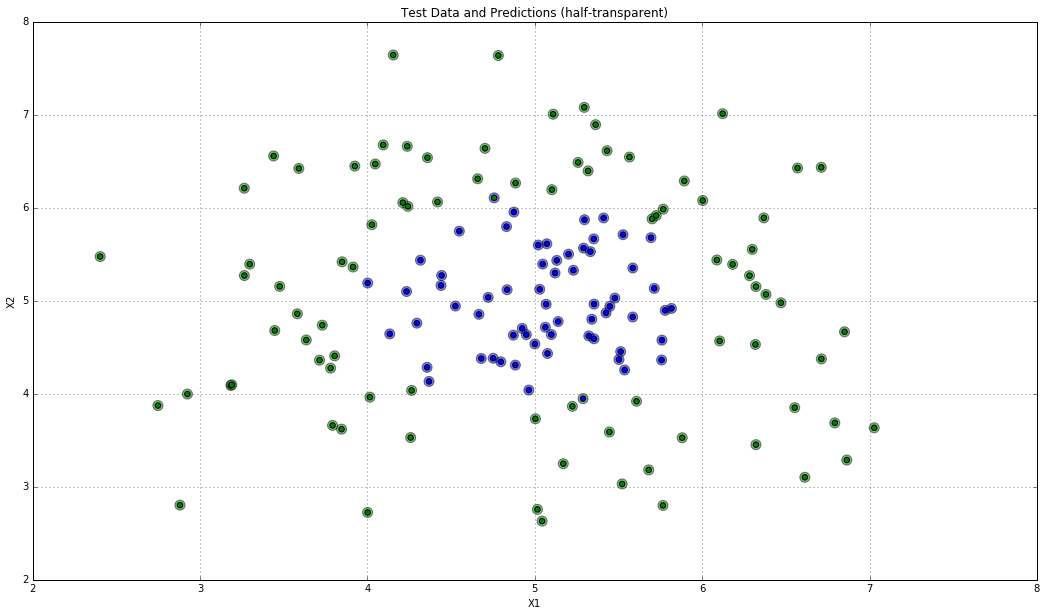

In [22]:
#7) График результата классификации для наилучшего случая для обучающего и тестового подмножеств

def plot_classification(name, x, y):
    x1 = [i[0] for i in x]
    x2 = [i[1] for i in x]
    
    plt.figure(1, figsize=[18, 10])
    plt.title(name)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.scatter(x1, x2, c=pl_regr_4_86.predict(x), s=100, cmap=clrMap, alpha=0.5)
    plt.scatter(x1, x2, c=y, s=30, cmap=clrMap)
    plt.grid(True)
    plt.show()

plot_classification("Train Data and Predictions (half-transparent)", x_train_init, y_train_init)
plot_classification("Test Data and Predictions (half-transparent)", x_test, y_test)